## Chen D, Shi D D, Qin M, et al. Complex network comparison based on communicability sequence entropy. Physical Review E, 2018, 98(1): 012319.

https://journals.aps.org/pre/abstract/10.1103/PhysRevE.98.012319

In [2]:
import numpy as np
import networkx as nx
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [9]:
def communicability_sequence_entropy(G, nom_flag):
    N = len(G)
    As = nx.adjacency_matrix(G)
    A = As.todense()
    C = expm(A)  # 计算通信矩阵

    # 获得通信序列并计算通信序列熵
    C_seq = C[np.triu_indices(N)]
    nom_C_seq = C_seq / sum(C_seq)
    # print(nom_C_seq)
    if nom_flag:
        M = N * (N + 1) / 2
        CSE = -np.sum(nom_C_seq * np.log2(nom_C_seq)) / np.log2(M)
    else:
        CSE = -np.sum(nom_C_seq * np.log2(nom_C_seq))

    return CSE

### The communicability sequence entropy of star networks

In [10]:
N = np.linspace(50, 1000, 20)
S = []
# print(N)
for n in N:
    G = nx.star_graph(int(n-1))
    # print(len(G))
    S.append(communicability_sequence_entropy(G, False))

Text(0, 0.5, '$S(P)$')

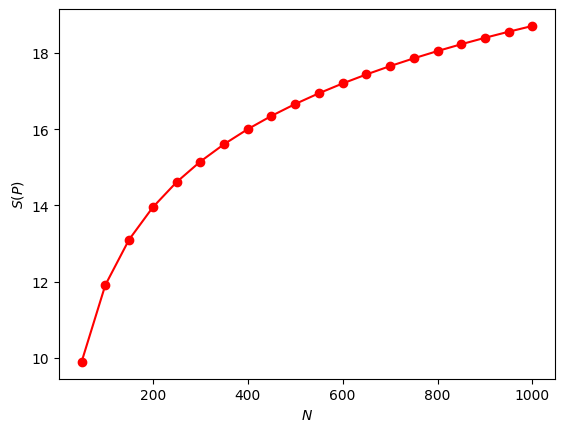

In [11]:
plt.plot(N, S, "ro-")
plt.xlabel("$N$")
plt.ylabel("$S(P)$")

### The communicability sequence entropy of Watts and Strogatz's small-world networks

In [14]:
N = 100
K = 4

P_rew = np.linspace(0, 1, 21)
CSE = []
samples = 100
for p in P_rew:
    CSEi = 0
    for i in range(samples):
        G = nx.watts_strogatz_graph(N, K, p)
        CSEi += communicability_sequence_entropy(G, True)
    CSE.append(CSEi/samples)

Text(0, 0.5, '$S_N$')

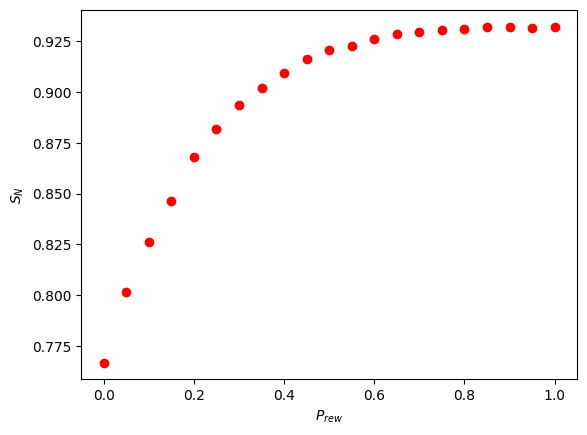

In [16]:
plt.plot(P_rew, CSE, "ro")
plt.xlabel("$P_{rew}$")
plt.ylabel("$S_N$")